# Bridges and Articulation Points

In an undirected graph, a bridge is an edge that if severed increases the number of connected components. This is a critical connection in the graph whose absence creates a partition. Likewise, an articulation point is a vertex whose removal increases the number of components.

The below graph has one bridge and one articulation point: `(a, b)` and `b` respectively.

In [1]:
graph = {'a': ['b'],
         'b': ['a', 'c', 'd'],
         'c': ['b', 'd'],
         'd': ['c', 'b']}

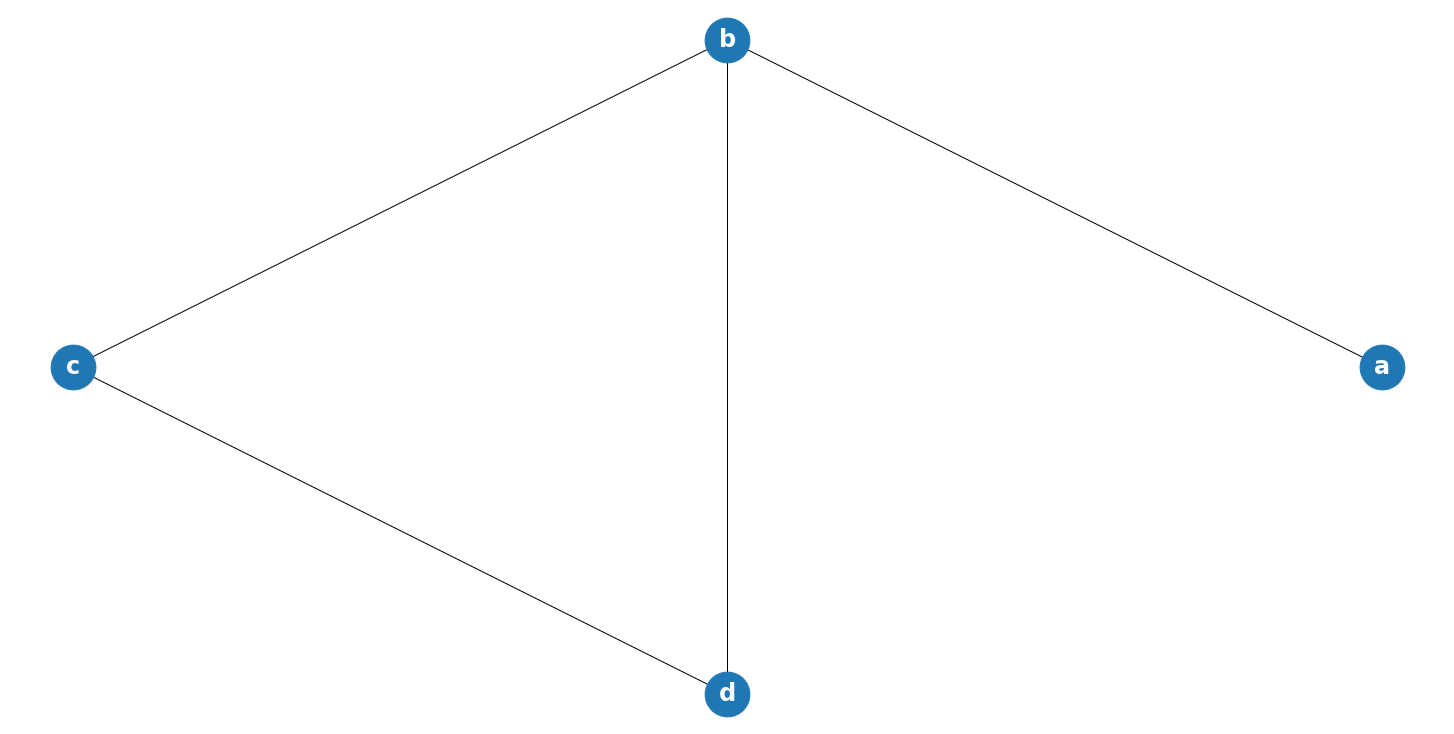

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))

G = nx.Graph(graph)
nx.draw_circular(G, with_labels=True, node_size=2000, font_size=24,
                    font_color='white', font_weight='bold')
plt.show()

## Bridges

[Wikipedia](https://en.wikipedia.org/wiki/Bridge_(graph_theory)) | [CP Algorithms](https://cp-algorithms.com/graph/bridge-searching.html) | [Leetcode](https://leetcode.com/problems/critical-connections-in-a-network/)

In [3]:
def find_bridges(graph):
    index = 0            
    indexes = {}
    low_links =  {}
    bridges = []

    def dfs(v, parent=None):
        nonlocal index
        
        indexes[v] = low_links[v] = index
        index += 1
        
        for w in graph[v]: 
            if w == parent:
                continue  
            elif w not in indexes:
                dfs(w, v)
                low_links[v] = min(low_links[v], low_links[w])
                
                if low_links[w] > indexes[v]:
                    bridges.append((v, w))
            else:
                low_links[v] = min(low_links[v], indexes[w])
            
    for v in graph:
        if v not in indexes:
            dfs(v)

    return bridges

In [4]:
result = find_bridges(graph)

assert result == list(nx.bridges(nx.Graph(graph)))
result

[('a', 'b')]

## Articulation Points

[Wikipedia](https://en.wikipedia.org/wiki/Biconnected_component) | [CP Algorithms](https://cp-algorithms.com/graph/cutpoints.html)

In [5]:
def find_articulation_points(graph):
    index = 0            
    indexes = {}
    low_links =  {}
    points = []

    def dfs(v, parent=None):
        nonlocal index
        
        indexes[v] = low_links[v] = index
        index += 1
        children = 0
        
        for w in graph[v]: 
            if w == parent:
                continue
            elif w not in indexes:
                dfs(w, v)
                low_links[v] = min(low_links[v], low_links[w])
                
                if parent is not None and low_links[w] >= indexes[v]:
                    points.append(v)
                
                children += 1
            else:
                low_links[v] = min(low_links[v], indexes[w])

        if parent is None and children > 1:
            points.append(v)

    for v in graph:
        if v not in indexes:
            dfs(v)

    return points


find_articulation_points(graph)   

['b']

In [6]:
result = find_articulation_points(graph)

assert result == list(nx.articulation_points(nx.Graph(graph)))
result

['b']